In [2]:
# Summer Academy NPS Data

In [48]:
### Import and set up data/display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

FILEPATH = "../datasets/2017/feedback.csv"

df = pd.read_csv(FILEPATH, index_col=0)

sns.set(style="white", context="notebook", palette="deep")
COLOR_COLUMNS = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]
sns.set_palette(palette=COLOR_COLUMNS, n_colors=4)

In [15]:
## How many more promoters are there than detractors across our 2017 data?

(-1.1097917354195055,
 1.1004662731152146,
 -1.1224835377140603,
 1.1089888454347638)

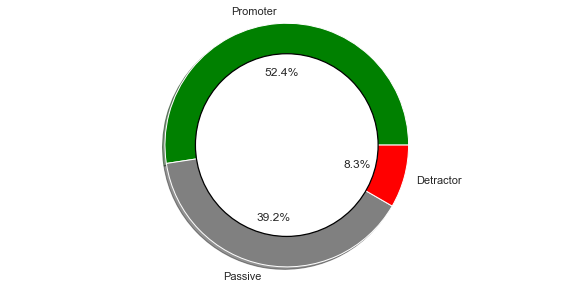

In [46]:
### Create new df without unrated feedback. Turn Rating (Num) from string into int
df_rated = df.copy()
df_rated = df_rated.loc[df['Rating (Num)'] != '#ERROR!']
df_rated['Rating (Num)'] = df_rated['Rating (Num)'].apply(lambda x: int(x))

### Split into NPS categories (Promoter, Passive, Detractor)
BINS = [0, 6, 8, 10]
LABELS = ["Detractor", "Passive", "Promoter"]

df_rated["nps_categories"] = pd.cut(df_rated['Rating (Num)'], BINS, include_lowest=True, labels=LABELS)

### Pie chart 
colors = ['green', 'gray', 'red']
fig, axs = plt.subplots(figsize=(10,5))
price_df = df_rated["nps_categories"].value_counts()
plt.pie(price_df.values, labels=["Promoter", "Passive", "Detractor"], colors=colors, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

In [43]:
df_rated["nps_categories"].value_counts()

Promoter     760
Passive      569
Detractor    121
Name: nps_categories, dtype: int64

In [47]:
### How many more promoters than detractors? Promoters - Detractors
760-121

639

In [ ]:
### 639 more promoters than detractors. 